<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/Otros/Tutorial_API_de_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

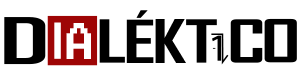

**INTRODUCCIÓN A LA API DE SPOTIFY PARA PYTHON 🎼**

Instalamos la librería:

In [5]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Se declaran las variables con las **credenciales** ([ver tutorial](https://dialektico.com/tutorial-api-spotify-python/)), y la variable que utilizaremos para acceder a la API.

In [6]:
# Se importan las librerías necesarias.
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials

# Se declara el ID del cliente.
client_id = '1ac2cc06cf774a9caa548b37a4e22ddf'

# Se declara el valor del secret client.
client_secret = '401d357f92584b80b26f40f9f8664eaa'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Visualizamos el formato en el que se entrega la información, usando como ejemplo la extracción de datos de la agrupación **Blackpink**.

In [7]:
# Se busca información sobre Blackpink.
result = sp.search(q='Blackpink', type='artist', limit=1)

# Se imprime el resultado.
result

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Blackpink&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/41MozSoPIsD1dJM0CLPjZF'},
    'followers': {'href': None, 'total': 41094116},
    'genres': ['k-pop', 'k-pop girl group', 'pop'],
    'href': 'https://api.spotify.com/v1/artists/41MozSoPIsD1dJM0CLPjZF',
    'id': '41MozSoPIsD1dJM0CLPjZF',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5ebc9690bc711d04b3d4fd4b87c',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab67616100005174c9690bc711d04b3d4fd4b87c',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f178c9690bc711d04b3d4fd4b87c',
      'width': 160}],
    'name': 'BLACKPINK',
    'popularity': 86,
    'type': 'artist',
    'uri': 'spotify:artist:41MozSoPIsD1dJM0CLPjZF'}],
  'limit': 1,
  'next': 'https://api.spotify.com/v1/search?query=Blackpink&type=

Ahora accedemos a un elemento en particular del diccionario, extrayendo el **número de seguidor**es del grupo en la plataforma:

In [8]:
# Se imprime el número de seguidores de Blackpink. 
result['artists']['items'][0]['followers']['total']

41094116

Obtenemos el top de canciones más populares de la banda utilizando el método [artist_top_tracks](https://spotipy.readthedocs.io/en/2.22.1/#spotipy.client.Spotify.artist_top_tracks): 

In [9]:
# Se busca información sobre Blackpink y se obtiene su ID de artista.
result = sp.search(q='Blackpink', type='artist', limit=1)
blackpink_id = result['artists']['items'][0]['id']

# Se obtienen las 10 canciones más escuchadas de Blackpink.
results = sp.artist_top_tracks(blackpink_id, country='US')

# Se imprime el nombre de las canciones.
for track in results['tracks']:
    print(track['name'])

Shut Down
Pink Venom
Tally
Typa Girl
How You Like That
Kill This Love
Lovesick Girls
As If It's Your Last
Hard to Love
DDU-DU DDU-DU


Creamos una función que crea una función para la extracción de 50 canciones de un **género** definido (entrada), sus características, y acomoda la información en un dataFrame de **Pandas**:

In [10]:
def songs_by_genre(genre):

    # Se buscan las 50 canciones más populares del género especificado.
    results = sp.search(q=f'genre:{genre}', type='track', limit=50)
    tracks = results['tracks']['items']

    # Se crea una lista de diccionarios con el nombre de la canción y las características deseadas.
    song_features = []
    for track in tracks:
        features = sp.audio_features(track['id'])[0]
        song_features.append({'Nombre': track['name'], 'Bailabilidad': features['danceability'], 'Energía': features['energy'], 'Acústica': features['acousticness'], 'Duración (ms)': features['duration_ms'],
                          'Acústica': features['acousticness'], 'Instrumentalidad': features['instrumentalness'], 'Sonoridad': features['loudness'], 'Tempo': features['tempo'], 
                          'Discursividad': features['speechiness'],'ID': features['id'], 'Modo': features['mode'], 'Valencia': features['valence'], 'Género': genre})
 

    # Se crea un dataFrame de Pandas con la información extraída.
    data_frame = pd.DataFrame(song_features)

    return data_frame

Creamos un bucle que obtenga estos datos para cada género especificado en una **lista**, y concatenamos las **tablas** resultantes:

In [11]:
# Se importa una librería para la generación de una barra de progreso.
from tqdm import tqdm

# Se crea una lista con los géneros musicales deseados.
genres_list = ['world-music', 'salsa', 'rock-n-roll', 'reggae', 'reggaeton', 'pop', 'black-metal', 'k-pop', 'hip-hop', 'electronic']

# Se itera sobre esta lista utilizando sus elementos como entradas de la función creada.
tables = []

for item in tqdm(genres_list, desc = 'Creando conjunto de datos:'): 
  table = songs_by_genre(item)
  tables.append(table)

# Se concatenan las tablas y se imprime el resultado.
dataset = pd.concat(tables)
dataset

Creando conjunto de datos:: 100%|██████████| 10/10 [00:30<00:00,  3.06s/it]


,Nombre,Bailabilidad,Energía,Acústica,Duración (ms),Instrumentalidad,Sonoridad,Tempo,Discursividad,ID,Modo,Valencia,Género
0,Oceans (Where Feet May Fail),0.262,0.361,0.508000,535963,0.002680,-10.187,126.786,0.0333,5Mw9bXG1dLNhbjofkVS2oR,1,0.0560,world-music
1,What A Beautiful Name,0.424,0.506,0.201000,238200,0.000000,-5.877,135.902,0.0284,4KLj9QjEhJl2WU50mxRF9Z,1,0.1380,world-music
2,So Will I (100 Billion X),0.431,0.416,0.046200,411000,0.000002,-10.376,127.964,0.0296,1ed3wNCecRIp6SugyR0w2J,1,0.1770,world-music
3,God Only Knows,0.597,0.417,0.395000,229760,0.000008,-7.952,143.839,0.0502,4ElNxglBjcrASiGn58t9Jm,1,0.2630,world-music
4,Who You Say I Am - Studio Version,0.376,0.650,0.004060,198705,0.000000,-8.147,171.907,0.0406,2KngtvMAc2wmPipizcEnce,1,0.3210,world-music
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,Praise You - Radio Edit,0.621,0.885,0.041800,227973,0.492000,-6.826,109.728,0.0473,21RDsw7wzUJNl2FbWTgEfJ,1,0.5540,electronic
46,Blue Monday,0.589,0.696,0.000087,267000,0.000034,-8.109,129.833,0.0340,5267gVdYWrLoz6ClOhlqmE,1,0.9380,electronic
47,Coming Back (feat. SZA),0.653,0.496,0.625000,195905,0.274000,-7.262,86.013,0.0868,2pSsHnjAgEPjHmet7ChlHQ,0,0.1020,electronic
48,Salta,0.653,0.604,0.044800,222250,0.908000,-10.177,119.980,0.0327,5L8R2cyft2HfQ1IlfVAbcz,0,0.0768,electronic


Por último se descarga en formato CSV:

In [15]:
# Se convierte a formato CSV.   
dataset.to_csv('dataset.csv', index=False)

# Se descarga el CSV.   
from google.colab import files
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

O en formato XLS:

In [17]:
# Se instala una dependiencia necesaria.
!pip install xlwt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.9 MB/s eta 0:00:00


In [18]:
# Se convierte a formato Excel.   
dataset.to_excel('dataset.xls', index=False)

# Se descarga el Excel.   
from google.colab import files
files.download('dataset.xls')

<ipython-input-18-ebfe25b97e62>:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  dataset.to_excel('dataset.xls', index=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

No olvides que puedes encontrar más tópicos como este en https://dialektico.com/.